<a href="https://colab.research.google.com/github/Arunim10/Pneumonia-detection-using-Pytorch/blob/main/chest_x_ray_images_pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('chest-x-ray-images-pneumonia')
jovian.set_colab_id('1HZolBYSSvxpn9ZkHR6mr70KEmSm0Wzg-')

# chest-x-ray-images-pneumonia

Use the "Run" button to execute the code.

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="chest-x-ray-images-pneumonia")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/arunimbasak/chest-x-ray-images-pneumonia


'https://jovian.ai/arunimbasak/chest-x-ray-images-pneumonia'

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 2.28G/2.29G [00:42<00:00, 90.6MB/s]
100% 2.29G/2.29G [00:42<00:00, 57.7MB/s]


In [ ]:
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [ ]:
!pip install jovian --upgrade --quiet
import jovian
jovian.commit(project="chest-x-ray-images-pneumonia")


[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/arunimbasak/chest-x-ray-images-pneumonia


'https://jovian.ai/arunimbasak/chest-x-ray-images-pneumonia'

# Importing libraries

In [ ]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib
import matplotlib.pyplot as plt
import torchvision.models as models
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [ ]:
train_dir = "/content/chest_xray/train"
val_dir = "/content/chest_xray/val"
test_dir = "/content/chest_xray/test"


In [ ]:
print(len(os.listdir(train_dir)))
print((os.listdir(train_dir)))

2
['NORMAL', 'PNEUMONIA']


In [ ]:
print(len(os.listdir(test_dir)))

2


In [ ]:
print(len(train_dir))

25


# Data Augmentation and batch normalization

In [ ]:
stats = ((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))

In [ ]:
train_tfms = tt.Compose([tt.Resize((256,256))
                        ,tt.RandomCrop(256,padding=4,padding_mode='reflect'),
                        #  ,tt.RandomHorizontalFlip(),
                         tt.ToTensor(),
                         tt.Normalize(*stats,inplace=True)])
valid_tfms = tt.Compose([tt.Resize((256,256)),
                         tt.ToTensor(),
                         tt.Normalize(*stats)])
test_tfms = tt.Compose([tt.Resize((256,256)),
                         tt.ToTensor(),
                         tt.Normalize(*stats)])

#Creating train , validation and test datasets

In [ ]:
train_ds = ImageFolder(train_dir,train_tfms)
valid_ds = ImageFolder(val_dir,valid_tfms)
test_ds = ImageFolder(test_dir,test_tfms)

In [ ]:
print(len(train_ds))
print(len(valid_ds))
print(len(test_ds))

5216
16
624


In [ ]:
train_ds.classes

['NORMAL', 'PNEUMONIA']

In [ ]:
len(train_ds)

5216

In [ ]:
len(test_ds)

624

In [ ]:
train_ds[0][0].shape

torch.Size([3, 256, 256])

(3, 256, 256)
[-1.7411594  -1.7582842  -1.7925336  ... -0.32296288 -0.30553368
 -0.28810447]
(196608,)
0.24668741


(array([15211., 15709.,  8230., 16982., 29548., 33523., 28463., 31509.,
        16609.,   824.]),
 array([-2.117904  , -1.6525711 , -1.1872382 , -0.7219053 , -0.2565724 ,
         0.2087605 ,  0.67409337,  1.1394262 ,  1.6047592 ,  2.070092  ,
         2.535425  ], dtype=float32),
 <a list of 10 Patch objects>)

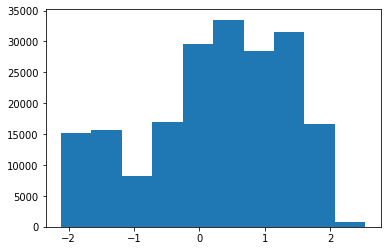

In [ ]:
import numpy as np
img = np.array(train_ds[0][0])
print(np.shape(img))
print(img.ravel())
print(np.shape(img.ravel()))
print(np.mean(img.ravel()))
plt.hist(img.ravel())

In [ ]:
batch_size = 32

In [ ]:
train_dl = DataLoader(train_ds,batch_size,shuffle=True,num_workers=2,pin_memory=True)
valid_dl = DataLoader(valid_ds,batch_size*2,num_workers=2,pin_memory=True)
test_dl = DataLoader(test_ds,batch_size,num_workers=2,pin_memory=True)

In [ ]:
def denormalize(image,means,stds):
  means = torch.tensor(means).reshape(1,3,1,1)
  print("means :",means)
  stds = torch.tensor(stds).reshape(1,3,1,1)
  print("stds :",stds)
  print("image.shape :",image.shape)
  return image*stds+means

def show_batch(dl):
  for images,labels in dl:
    fig,ax = plt.subplots(figsize=(12,12))
    ax.set_xticks([]);
    ax.set_yticks([]);
    denorm_images = denormalize(images,*stats)
    ax.imshow(make_grid(denorm_images[:64],nrow=8).permute(1,2,0).clamp(0,1))
    break

means : tensor([[[[0.4850]],

         [[0.4560]],

         [[0.4060]]]])
stds : tensor([[[[0.2290]],

         [[0.2240]],

         [[0.2250]]]])
image.shape : torch.Size([32, 3, 256, 256])


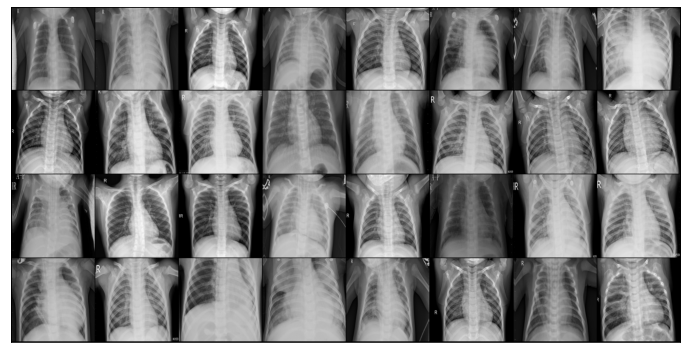

In [ ]:
show_batch(train_dl)

# Using GPU

In [ ]:
def get_default_device():
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    return torch.device('cpu')

def to_device(data,device):
  if isinstance(data,(list,tuple)):
    return [to_device(x,device) for x in data]
  return data.to(device,non_blocking=True)

class DeviceDataLoader():
  def __init__(self,dl,device):
    self.dl = dl
    self.device = device
  
  def __iter__(self):
    for b in self.dl:
      yield to_device(b,self.device)
  
  def __len__(self):
    return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
train_dl = DeviceDataLoader(train_dl,device)
valid_dl = DeviceDataLoader(valid_dl,device)
test_dl = DeviceDataLoader(test_dl,device)


In [ ]:
for img,_ in train_dl:
  print(img.shape)
  break

torch.Size([32, 3, 256, 256])


# Model with residual blocks and batch normalisation

In [ ]:
#Just some rough code for understanding
o = np.array([[6,4],[1,8],[4,10]])
o = torch.from_numpy(o)
val,pred = torch.max(o,dim=1)
print(val)
o=val>9
print(o)
w = np.array([True,True,False])
w = torch.from_numpy(w)
print(w)
((o)&(~w)).sum().float()

tensor([ 6,  8, 10])
tensor([False, False,  True])
tensor([ True,  True, False])


tensor(1.)

In [ ]:
def F_score(output, label, threshold=0.5, beta=1):
    val,out = torch.max(output,dim=1)
    prob = val > threshold
    label = label > threshold
    # print("prob: ",prob)
    # print("label: ",label)
    TP = (prob & label).sum().float()
    TN = ((~prob) & (~label)).sum().float()
    FP = (prob & (~label)).sum().float()
    FN = ((~prob) & label).sum().float()

    precision = torch.mean(TP / (TP + FP + 1e-12))
    recall = torch.mean(TP / (TP + FN + 1e-12))
    F2 = (1 + beta**2) * precision * recall / (beta**2 * precision + recall + 1e-12)
    return F2.mean(0)

In [ ]:
def accuracy(outputs,labels):
  _,preds = torch.max(outputs,dim=1)
  return torch.tensor(torch.sum(preds==labels).item()/len(preds))

class MultilabelImageClassificationBase(nn.Module):
  def training_step(self,batch):
    images,labels = batch
    out = self(images)
    loss = F.cross_entropy(out,labels)
    return loss
  
  def validation_step(self,batch):
    images,labels = batch
    # print(images.shape)
    # print(images)
    # print(labels.shape)
    out = self(images)
    # print("OUT ")
    # print(out)
    # print(out.shape)
    loss = F.cross_entropy(out,labels)
    score = F_score(out,labels)
    acc = accuracy(out,labels)
    return {'val_loss':loss.detach(),'val_acc':acc,'val_score':score.detach()}
  
  def validation_epoch_end(self,outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()
    batch_scores = [x['val_score'] for x in outputs]
    epoch_score = torch.stack(batch_scores).mean()
    return {'val_loss':epoch_loss.item(), 'val_acc':epoch_acc.item(), 'val_score':epoch_score.item()}

  def epoch_end(self,epoch,result):
    print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}, val_score: {:.4f}".format(
        epoch,result['lrs'][-1],result['train_loss'],result['val_loss'],result['val_acc'],result['val_score']))

In [ ]:
resnet18 = models.resnet18()
resnet18

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
class ResnetImage(MultilabelImageClassificationBase):
    def __init__(self):
        super().__init__()
        # Use a pretrained model
        self.network = models.resnet18(pretrained=True)
        # Replace last layer
        num_ftrs = self.network.fc.in_features
        self.network.fc = nn.Linear(num_ftrs, 2)
    
    def forward(self, xb):
        return torch.sigmoid(self.network(xb))
    
    def freeze(self):
        # To freeze the residual layers
        for param in self.network.parameters():
            param.require_grad = False
        for param in self.network.fc.parameters():
            param.require_grad = True
    
    def unfreeze(self):
        # Unfreeze all layers
        for param in self.network.parameters():
            param.require_grad = True

# Training the model

In [ ]:
@torch.no_grad()
def evaluate(model,val_loader):
  model.eval()
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

def get_lr(optimizer):
  for param_group in optimizer.param_groups:
    return param_group['lr']
  
def fit_one_cycle(epochs,max_lr,model,train_loader,val_loader,
                  weight_decay=0,grad_clip=None,opt_func = torch.optim.SGD):
  torch.cuda.empty_cache()
  history = []

  optimizer = opt_func(model.parameters(),max_lr,weight_decay=weight_decay)

  sched = torch.optim.lr_scheduler.OneCycleLR(optimizer,max_lr,epochs=epochs,steps_per_epoch=len(train_loader))

  for epoch in range(epochs):
    model.train()
    train_losses = []
    lrs = []
    for batch in train_loader:
      loss = model.training_step(batch)
      train_losses.append(loss)
      loss.backward()
      
      if grad_clip:
        nn.utils.clip_grad_value_(model.parameters(),grad_clip)

      optimizer.step()
      optimizer.zero_grad()

      lrs.append(get_lr(optimizer))
      sched.step()

    result = evaluate(model,val_loader)
    result['train_loss']=torch.stack(train_losses).mean().item()
    result['lrs'] = lrs
    model.epoch_end(epoch,result)
    history.append(result)
  return history

In [ ]:
model = to_device(ResnetImage(),device)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
model

ResnetImage(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [ ]:
history = [evaluate(model,valid_dl)]
history

[{'val_acc': 0.5,
  'val_loss': 0.6944711804389954,
  'val_score': 0.6666666865348816}]

In [ ]:
!pip install jovian --upgrade --quiet
import jovian
jovian.commit(project="chest-x-ray-images-pneumonia")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/arunimbasak/chest-x-ray-images-pneumonia


'https://jovian.ai/arunimbasak/chest-x-ray-images-pneumonia'

In [ ]:
model.freeze()

In [ ]:
epochs = 8
max_lr = 1e-4
grad_clip = 1
weight_decay = 1e-6
opt_func = torch.optim.Adam

In [ ]:
%%time
history+=(fit_one_cycle(epochs,max_lr,model,train_dl,valid_dl,
                        grad_clip=grad_clip,
                        weight_decay=weight_decay,
                        opt_func=opt_func))

Epoch [0], last_lr: 0.00004, train_loss: 0.5505, val_loss: 0.5188, val_acc: 0.8125, val_score: 0.6667
Epoch [1], last_lr: 0.00009, train_loss: 0.3488, val_loss: 0.5349, val_acc: 0.7500, val_score: 0.6667
Epoch [2], last_lr: 0.00010, train_loss: 0.3375, val_loss: 0.3965, val_acc: 0.9375, val_score: 0.6667
Epoch [3], last_lr: 0.00008, train_loss: 0.3269, val_loss: 0.4758, val_acc: 0.8125, val_score: 0.6667
Epoch [4], last_lr: 0.00006, train_loss: 0.3216, val_loss: 0.3494, val_acc: 1.0000, val_score: 0.6667
Epoch [5], last_lr: 0.00003, train_loss: 0.3191, val_loss: 0.3636, val_acc: 1.0000, val_score: 0.6667
Epoch [6], last_lr: 0.00001, train_loss: 0.3169, val_loss: 0.3333, val_acc: 1.0000, val_score: 0.6667
Epoch [7], last_lr: 0.00000, train_loss: 0.3158, val_loss: 0.3374, val_acc: 1.0000, val_score: 0.6667
CPU times: user 1min 56s, sys: 1min 9s, total: 3min 6s
Wall time: 12min 45s


In [ ]:
train_time='13:04s'

In [ ]:
model.unfreeze()

In [ ]:
%%time
history+=(fit_one_cycle(epochs,1e-5,model,train_dl,valid_dl,
                        grad_clip=grad_clip,
                        weight_decay=weight_decay,
                        opt_func=opt_func))

Epoch [0], last_lr: 0.00000, train_loss: 0.3160, val_loss: 0.3309, val_acc: 1.0000, val_score: 0.6667
Epoch [1], last_lr: 0.00001, train_loss: 0.3171, val_loss: 0.3362, val_acc: 1.0000, val_score: 0.6667
Epoch [2], last_lr: 0.00001, train_loss: 0.3156, val_loss: 0.3234, val_acc: 1.0000, val_score: 0.6667
Epoch [3], last_lr: 0.00001, train_loss: 0.3152, val_loss: 0.3159, val_acc: 1.0000, val_score: 0.6667
Epoch [4], last_lr: 0.00001, train_loss: 0.3151, val_loss: 0.3306, val_acc: 1.0000, val_score: 0.6667
Epoch [5], last_lr: 0.00000, train_loss: 0.3155, val_loss: 0.3181, val_acc: 1.0000, val_score: 0.6667
Epoch [6], last_lr: 0.00000, train_loss: 0.3145, val_loss: 0.3151, val_acc: 1.0000, val_score: 0.6667
Epoch [7], last_lr: 0.00000, train_loss: 0.3146, val_loss: 0.3188, val_acc: 1.0000, val_score: 0.6667
CPU times: user 1min 57s, sys: 1min 9s, total: 3min 7s
Wall time: 12min 47s


In [ ]:
time = '13:17s'

In [ ]:
!pip install jovian --upgrade --quiet
import jovian
jovian.commit(project="chest-x-ray-images-pneumonia")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/arunimbasak/chest-x-ray-images-pneumonia


'https://jovian.ai/arunimbasak/chest-x-ray-images-pneumonia'

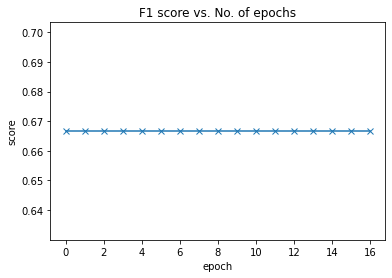

In [ ]:
def plot_scores(history):
    scores = [x['val_score'] for x in history]
    plt.plot(scores, '-x')
    plt.xlabel('epoch')
    plt.ylabel('score')
    plt.title('F1 score vs. No. of epochs');
plot_scores(history)

In [ ]:
def plot_accuracies(history):
  accuracies = [x['val_acc'] for x in history]
  plt.plot(accuracies,'-x')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.title('Accuracy vs No. of epochs')


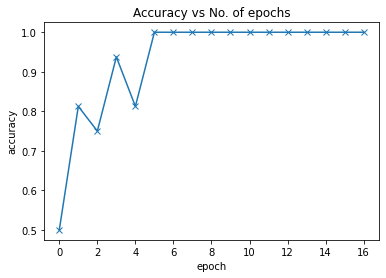

In [ ]:
plot_accuracies(history)

In [ ]:
def plot_losses(history):
  train_losses = [x.get('train_loss') for x in history]
  val_losses = [x['val_loss'] for x in history]
  plt.plot(train_losses,'-bx')
  plt.plot(val_losses,'-rx')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['Training','Validation'])
  plt.title('Loss vs No. of epochs')

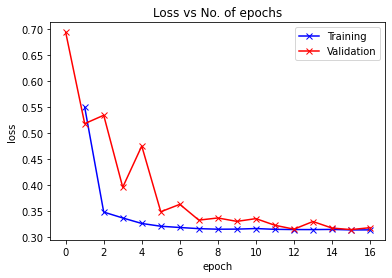

In [ ]:
plot_losses(history)

In [ ]:
def plot_lrs(history):
  lrs = np.concatenate([x.get('lrs',[]) for x in history])
  print(lrs)
  plt.plot(lrs)
  plt.xlabel('Batch no.')
  plt.ylabel('Learning Rate')
  plt.title('Learning Rate vs Batch no.')

In [ ]:
print(history)

[{'val_loss': 0.6944711804389954, 'val_acc': 0.5, 'val_score': 0.6666666865348816}, {'val_loss': 0.5187848806381226, 'val_acc': 0.8125, 'val_score': 0.6666666865348816, 'train_loss': 0.5504536628723145, 'lrs': [4.000000000000002e-06, 4.001555729586079e-06, 4.006222817498666e-06, 4.014000961207519e-06, 4.02488965651728e-06, 4.038888197600217e-06, 4.055995677041969e-06, 4.0762109859004015e-06, 4.099532813777381e-06, 4.125959648903886e-06, 4.15548977823784e-06, 4.188121287575247e-06, 4.223852061674245e-06, 4.262679784392264e-06, 4.304601938836061e-06, 4.349615807525004e-06, 4.397718472567104e-06, 4.448906815848224e-06, 4.503177519234197e-06, 4.560527064785896e-06, 4.620951734987308e-06, 4.684447612986442e-06, 4.751010582849317e-06, 4.820636329826706e-06, 4.8933203406338296e-06, 4.96905790374293e-06, 5.0478441096886895e-06, 5.129673851386458e-06, 5.214541824463329e-06, 5.3024425276019084e-06, 5.393370262897037e-06, 5.487319136225025e-06, 5.5842830576258336e-06, 5.684255741697711e-06, 5.787

[4.00000000e-06 4.00155573e-06 4.00622282e-06 ... 1.58452718e-10
 6.96132672e-11 4.00000000e-11]


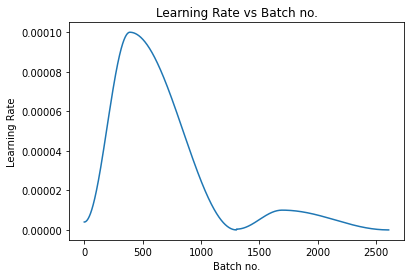

In [ ]:
plot_lrs(history)

# Testing with individual images

In [ ]:
def predict_image(img,model):
  xb = to_device(img.unsqueeze(0),device)
  yb = model(xb)
  _,preds = torch.max(yb,dim=1)
  return train_ds.classes[preds[0].item()]

In [ ]:
def predict_image_label(img,model):
  xb = to_device(img.unsqueeze(0),device)
  yb = model(xb)
  _,preds = torch.max(yb,dim=1)
  return  preds[0].item()

In [ ]:
img,label = test_ds[1]
predict_image_label(img,model)

0

In [ ]:
img,label = test_ds[1]
print(img.shape)

torch.Size([3, 256, 256])


Label:  NORMAL  , Predicted:  NORMAL


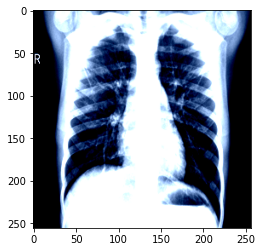

In [ ]:
img,label = test_ds[1]
plt.imshow(img.permute(1,2,0).clamp(0,1))
print('Label: ',train_ds.classes[label],' , Predicted: ',predict_image(img,model))

In [ ]:
# for images,label in test_dl:
#   x = label.numpy()
#   print(np.shape(x))
#   break

In [ ]:
def countMismatch(test_ds,model):
  count = 0
  for x in range(len(test_ds)):
    img,label = test_ds[x]
    prediction = predict_image_label(img,model)
    if (label!=prediction):
      count+=1
  return count

In [ ]:
countMismatch(test_ds,model)

108

In [ ]:
len(test_ds)

624

In [ ]:
print(len(valid_ds))

16


In [ ]:
history+=[evaluate(model,test_dl)]
history[-1]

{'val_acc': 0.831250011920929,
 'val_loss': 0.47361239790916443,
 'val_score': 0.6407407522201538}

In [ ]:
print(len(test_ds))

624


In [ ]:
print(len(train_ds))

5216


# Save and commit

In [ ]:
torch.save(model.state_dict(),'chest-x-ray-images-pneumonia.pth')

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
jovian.reset()
jovian.log_hyperparams(arch='resnet9',
                       epochs=epochs,
                       lr=max_lr,
                       scheduler='one_cycle',
                       weight_decay=weight_decay,
                       grad_clip=grad_clip,
                       opt=opt_func.__name__)

[jovian] Hyperparams logged.


In [ ]:
jovian.log_metrics(val_loss=history[-1]['val_loss'],
                   val_acc=history[-1]['val_acc'],
                   val_score = history[-1]['val_score'],
                   time=train_time)

[jovian] Metrics logged.


In [ ]:
jovian.commit(project='chest-x-ray-images-pneumonia',environment=None,outputs=['chest-x-ray-images-pneumonia.pth'])

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Uploading additional outputs...
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
Committed successfully! https://jovian.ai/arunimbasak/chest-x-ray-images-pneumonia


'https://jovian.ai/arunimbasak/chest-x-ray-images-pneumonia'